In [112]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [113]:
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"

import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [114]:
%matplotlib inline
import matplotlib.pyplot as plt

In [115]:
import torch
import numpy as np

In [124]:
eps = torch.load('../test/epistemic.pt').numpy()
oods = torch.load('../test/oods.pt').numpy()
eps_cvt = torch.load('../test/cvt/epistemic.pt').numpy()
oods_cvt = torch.load('../test/cvt/oods.pt').numpy()

In [127]:
print(oods.mean(), oods_cvt.mean())
print(eps.mean(), eps_cvt.mean())

0.0001876953125 0.0001876953125
0.01257856 0.004759187


In [122]:
eps_ood = eps[oods.astype(np.bool_)]
eps_id = eps[~oods.astype(np.bool_)]

Text(0.5, 0, 'Vacuity')

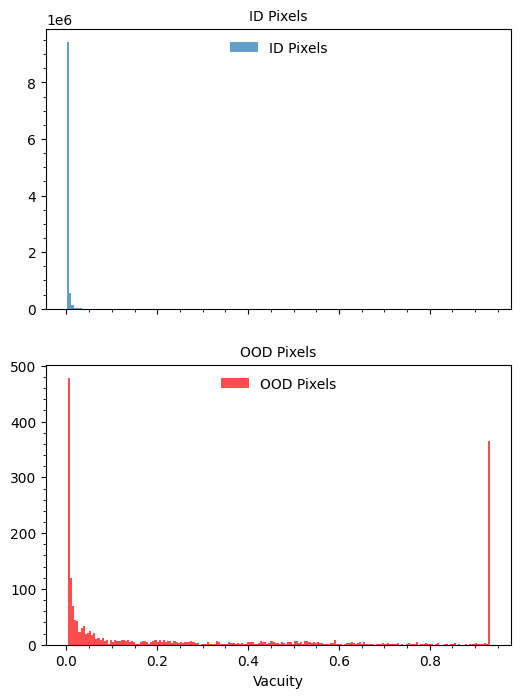

In [123]:
fig, axs = plt.subplots(2, 1, figsize=(6, 8), sharex=True)

axs[0].hist(eps_id.flatten(), bins=200, label="ID Pixels", alpha=.7)
axs[0].set_title("ID Pixels", fontsize=10)

axs[1].hist(eps_ood.flatten(), bins=200, label="OOD Pixels", alpha=.7, color='r')
axs[1].set_title("OOD Pixels", fontsize=10)

for ax in axs.flatten():
    ax.grid(False)
    ax.legend(loc="upper center", frameon=False, ncol=2, fontsize=10)
    
    ax.yaxis.get_ticklocs(minor=True)
    ax.xaxis.get_ticklocs(minor=True)
    ax.minorticks_on()

a = fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
a.set_xlabel("Vacuity")